# **TO DO FIRST**

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

https://github.com/bchao1/Anime-Face-Dataset/

https://www.kaggle.com/tunguz/70000-real-faces-1

In [2]:
import os
from fastai.vision import *
from fastai.metrics import error_rate

# ***Kaggle uploaded data - Start from here***

https://www.kaggle.com/sanyam1992000/anime-faces-vs-human-faces

In [3]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


In [4]:
import pandas as pd
import os
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

In [5]:
!kaggle datasets download -d sanyam1992000/anime-faces-vs-human-faces

100% 3.81G/3.81G [01:11<00:00, 22.2MB/s]
100% 3.81G/3.81G [01:11<00:00, 57.2MB/s]


In [6]:
!unzip "*.zip"

Streaming output truncated to the last 5000 lines.
  inflating: Data/anime/1908_2001.jpg  
  inflating: Data/anime/1909_2001.jpg  
  inflating: Data/anime/190_2000.jpg  
  inflating: Data/anime/1910_2001.jpg  
  inflating: Data/anime/1911_2001.jpg  
  inflating: Data/anime/1912_2001.jpg  
  inflating: Data/anime/1913_2001.jpg  
  inflating: Data/anime/1914_2001.jpg  
  inflating: Data/anime/1915_2001.jpg  
  inflating: Data/anime/1916_2001.jpg  
  inflating: Data/anime/1917_2001.jpg  
  inflating: Data/anime/1918_2001.jpg  
  inflating: Data/anime/1919_2001.jpg  
  inflating: Data/anime/191_2000.jpg  
  inflating: Data/anime/1920_2001.jpg  
  inflating: Data/anime/1921_2001.jpg  
  inflating: Data/anime/1922_2001.jpg  
  inflating: Data/anime/1923_2001.jpg  
  inflating: Data/anime/1924_2001.jpg  
  inflating: Data/anime/1925_2001.jpg  
  inflating: Data/anime/1926_2001.jpg  
  inflating: Data/anime/1927_2001.jpg  
  inflating: Data/anime/1928_2001.jpg  
  inflating: Data/anime/1929_20

In [7]:
path = 'Data'
classes = ['anime', 'human']

In [8]:
help(verify_images)

Help on function verify_images in module fastai.vision.data:

verify_images(path:Union[pathlib.Path, str], delete:bool=True, max_workers:int=4, max_size:int=None, recurse:bool=False, dest:Union[pathlib.Path, str]='.', n_channels:int=3, interp=2, ext:str=None, img_format:str=None, resume:bool=None, **kwargs)
    Check if the images in `path` aren't broken, maybe resize them and copy it in `dest`.



In [9]:
for c in classes:
    print(c)
    verify_images(path + '/' +c, delete=True, max_size=3000)

anime


cannot identify image file <_io.BufferedReader name='Data/anime/1147_2001.jpg'>
cannot identify image file <_io.BufferedReader name='Data/anime/154_2000.jpg'>
cannot identify image file <_io.BufferedReader name='Data/anime/2125_2001.jpg'>
human


# ***Training***




In [10]:
np.random.seed(2)

In [11]:
tfms = get_transforms(do_flip=True)
data = ImageDataBunch.from_folder( Path("/content/Data"), valid_pct=0.2, bs=64, size=224, ds_tfms=get_transforms()).normalize(imagenet_stats)

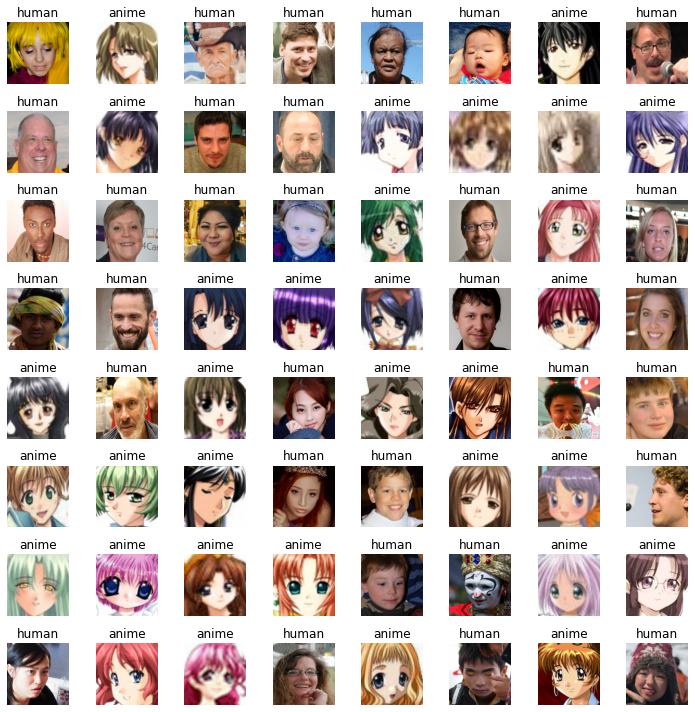

In [12]:
data.show_batch(rows=10, figsize=(10,10))

In [13]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

['anime', 'human']


2

In [14]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)
# help(cnn_learner)
# doc(cnn_learner)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [15]:
from PIL import ImageFile
from PIL import Image
ImageFile.LOAD_TRUNCATED_IMAGES = True
Image.LOAD_TRUNCATED_IMAGES = True

In [16]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.019896,0.000001,1.000000,03:01
1,0.004220,0.002070,0.999167,02:58
2,0.001827,0.000001,1.000000,03:02
3,0.000971,0.000001,1.000000,03:01


In [17]:
os.makedirs("/content/drive/My Drive/dl_projects/anime_faces_vs_human_faces",exist_ok=True)
dir = "/content/drive/My Drive/dl_projects/anime_faces_vs_human_faces"

In [18]:
learn.save(dir+"/Stage-1")

In [ ]:
dir = "/content/drive/My Drive/dl_projects/anime_faces_vs_human_faces"

learn.load(dir + "/Stage-1")

In [21]:
learn.export(dir+"/export.pkl")

# ***Results***

In [22]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

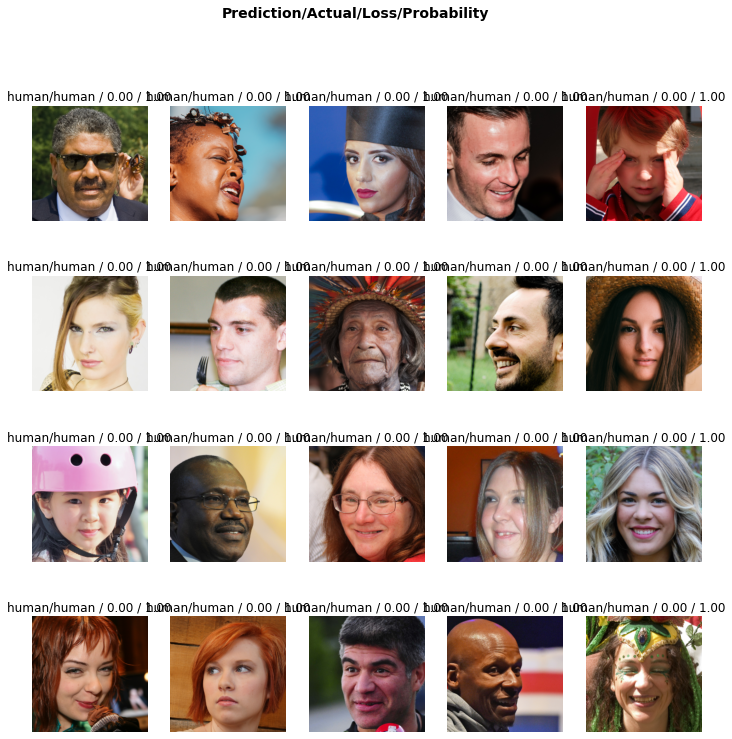

In [23]:
interp.plot_top_losses(20, figsize=(12,12))

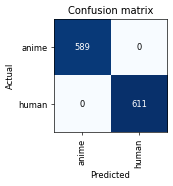

In [24]:
interp.plot_confusion_matrix(figsize=(3,3), dpi=60)

In [25]:
interp.most_confused(min_val=2)

[]

# `Prediction`

In [26]:
dir = '/content/drive/My Drive/dl_projects/anime_faces_vs_human_faces'
predictor = load_learner(dir)

In [27]:
def my_predictor(im):
  test_img = open_image(im)
  pred_class,pred_idx,outputs = predictor.predict(test_img)
  return pred_class

In [ ]:
from google.colab import files
my_file = files.upload()

In [ ]:
path = list(my_file.keys())
path

In [ ]:
for i in path:
  img = open_image(i)
  img.show()
  print(my_predictor(i))